In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from wpca import WPCA
from plotting import plot_dynamic_spectra

In [75]:
def normalize_dynamic_spectra(dynamic_spectra):
    """
    Normalize a dynamic spectra to have values between 0 and 1.

    Parameters:
        dynamic_spectra (numpy.ndarray): The input dynamic spectra.

    Returns:
        numpy.ndarray: The normalized dynamic spectra.
    """
    min_value = np.min(dynamic_spectra)
    max_value = np.max(dynamic_spectra)
    range_value = max_value - min_value


    normalized_dynamic_spectra = (dynamic_spectra - min_value) / range_value

    return normalized_dynamic_spectra

In [76]:
# Load and prepare your data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_simple_bursts"

# Load the data from both directories into separate arrays
data_scattered = []
data_simple = []

for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        # Create a MinMaxScaler instance
        scaler = MinMaxScaler()
        data_scattered.append(normalize_dynamic_spectra(np.load(os.path.join(data_dir_scattered, filename))))

for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        # Create a MinMaxScaler instance
        scaler = MinMaxScaler()
        data_simple.append(normalize_dynamic_spectra(np.load(os.path.join(data_dir_simple, filename))))

data_scattered = np.array(data_scattered)[0:100]
data_simple = np.array(data_simple)[0:100]



# Combine the two datasets into one
combined_data = np.concatenate((data_scattered, data_simple), axis=0)

# Reshape the combined data for WPCA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

print(combined_data_2d.shape)
print(np.max(combined_data_2d))

(200, 524288)
1.0


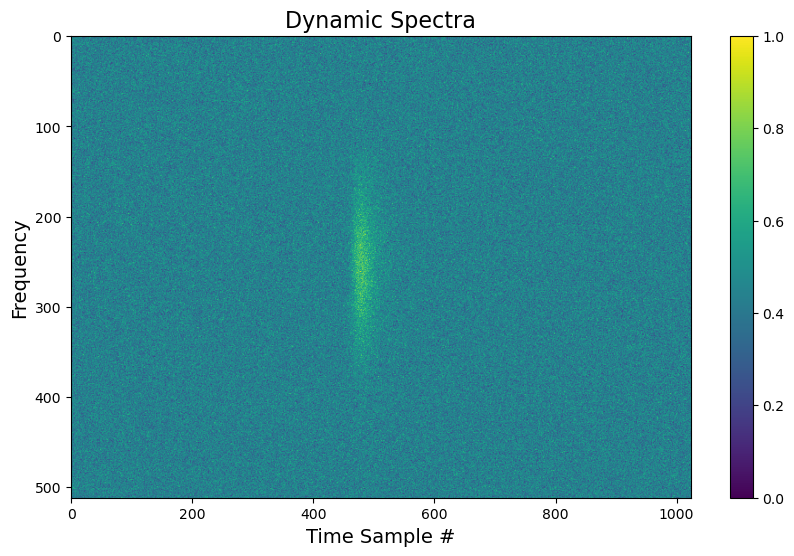

In [77]:
plot_dynamic_spectra(data_scattered[80])

In [78]:
noise_regions = combined_data_2d[:20, :20]

print(noise_regions)

[[0.5492179  0.5613887  0.5937393  0.531996   0.5518752  0.5112606
  0.43654785 0.55958587 0.5774069  0.49977452 0.4927906  0.3200949
  0.5979062  0.5158057  0.4633541  0.49839738 0.46517783 0.5385836
  0.5306854  0.51818246]
 [0.5314134  0.5431896  0.5744915  0.5147498  0.5339845  0.4946866
  0.42239586 0.54144526 0.5586886  0.48357287 0.47681534 0.3097181
  0.5785233  0.49908438 0.4483331  0.48224038 0.45009774 0.5211238
  0.5134817  0.5013841 ]
 [0.56909704 0.5817084  0.6152299  0.5512518  0.5718505  0.5297659
  0.45234886 0.57984036 0.59830636 0.51786405 0.5106273  0.3316809
  0.6195476  0.5344755  0.4801254  0.51643705 0.48201513 0.5580778
  0.5498938  0.53693825]
 [0.54178345 0.5537895  0.5857022  0.5247947  0.54440475 0.50434
  0.43063855 0.55201113 0.56959087 0.4930094  0.48612    0.31576198
  0.5898127  0.5088236  0.45708197 0.49165088 0.45888102 0.5312931
  0.5235019  0.5111681 ]
 [0.57994926 0.5928011  0.6269619  0.56176376 0.58275527 0.5398681
  0.4609748  0.59089744 0.6097

In [61]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(combined_data_2d)

print(scaled_data.shape)
print(np.max(scaled_data))

(200, 524288)
1.0


In [80]:
noise_regions = combined_data_2d[:,:200]
print(noise_regions)
print(noise_regions.shape)
for i in noise_regions:
    print(np.var(i))

[[0.5492179  0.5613887  0.5937393  ... 0.31613284 0.5776203  0.44844493]
 [0.5314134  0.5431896  0.5744915  ... 0.30588445 0.5588951  0.43390727]
 [0.56909704 0.5817084  0.6152299  ... 0.3275754  0.59852755 0.4646766 ]
 ...
 [0.57994926 0.5928011  0.6269619  ... 0.333822   0.609941   0.4735376 ]
 [0.57994926 0.5928011  0.6269619  ... 0.333822   0.609941   0.4735376 ]
 [0.37859747 0.38698727 0.40928784 ... 0.21792279 0.3981764  0.30913073]]
(200, 200)
0.011172908
0.010460245
0.011996362
0.010872474
0.012458247
0.012458247
0.012458247
0.012458247
0.012458247
0.010831057
0.012458247
0.0072303917
0.012458247
0.012458247
0.012458247
0.0069203232
0.012024833
0.012458247
0.010255811
0.01209462
0.011290185
0.008029387
0.012161684
0.008516074
0.01220494
0.008761902
0.012458247
0.012458247
0.012458247
0.012458247
0.012458247
0.012458247
0.0046926783
0.012458247
0.011365304
0.012025234
0.012458247
0.008168516
0.012458247
0.010157134
0.012458247
0.0056764265
0.012458247
0.012458247
0.008825728
0.0

In [ ]:
# Create a WPCA instance and fit it to the data with weights
wpca = WPCA(n_components=2)  # Number of principal components to keep
wpca.fit(combined_data_2d, weights=weights)